In [3]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.10.1
2.10.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0

In [5]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [6]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same',input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2),strides=(2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer=keras.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dropout_1 (Dropout)         (None, 9216)              0         
                                                        

In [7]:
history = model.fit(train_images, train_labels, batch_size=512, 
                    validation_data=(test_images, test_labels), epochs=50)

Epoch 1/50
118/118 [==============================] - 6s 19ms/step - loss: 0.8275 - accuracy: 0.7086 - val_loss: 0.4511 - val_accuracy: 0.8371
Epoch 2/50
118/118 [==============================] - 2s 17ms/step - loss: 0.5136 - accuracy: 0.8217 - val_loss: 0.3813 - val_accuracy: 0.8628
Epoch 3/50
118/118 [==============================] - 2s 17ms/step - loss: 0.4443 - accuracy: 0.8451 - val_loss: 0.3551 - val_accuracy: 0.8718
Epoch 4/50
118/118 [==============================] - 2s 17ms/step - loss: 0.4070 - accuracy: 0.8569 - val_loss: 0.3261 - val_accuracy: 0.8824
Epoch 5/50
118/118 [==============================] - 2s 17ms/step - loss: 0.3762 - accuracy: 0.8687 - val_loss: 0.3050 - val_accuracy: 0.8875
Epoch 6/50
118/118 [==============================] - 2s 17ms/step - loss: 0.3568 - accuracy: 0.8745 - val_loss: 0.2980 - val_accuracy: 0.8909
Epoch 7/50
118/118 [==============================] - 2s 17ms/step - loss: 0.3410 - accuracy: 0.8801 - val_loss: 0.2836 - val_accuracy: 0.8975

In [8]:
max_tr_acc = max(history.history['accuracy'])
max_val_acc = max(history.history['val_accuracy'])
print('max training accuracy = {:.4}'.format(100*max_tr_acc))
print('max validation accuracy = {:.4}'.format(100*max_val_acc))

max training accuracy = 93.76
max validation accuracy = 92.83


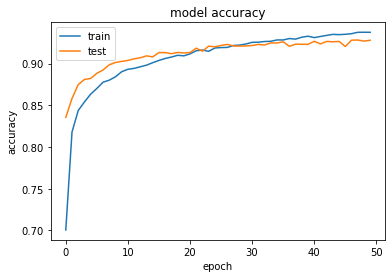

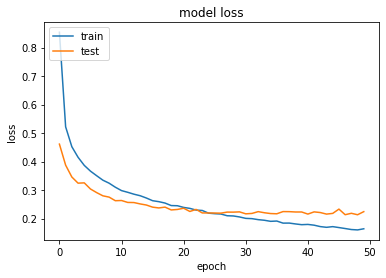

In [10]:
# plot accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plot loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Dropout x1: loss: 0.0646 - accuracy: 0.9722 - val_loss: 0.3612 - val_accuracy: 0.9298 <br>
Dropout x3: loss: 0.1521 - accuracy: 0.9420 - val_loss: 0.2214 - val_accuracy: 0.9278 <br>
val_accuracy ไม่ได้ต่างกันสักเท่าไหร่ แต่เหมือนว่าภาพ val_loss นั้นมีแนวโน้มลดลงอย่างเห็นได้ชัด <br>
ลด overfitting ได้ <br>

อย่างไรก็ตามอยากลองเพิ่มจำนวนชั้นของ Conv และ ความกว้างของ Dense ดูโดยคาดหวังว่าจะทำให้ acc โดยรวมนั้นเพิ่มขึ้น <br>
ไปที่ไฟล์ Convolution x 2 + Dense 256 + Dropout x 3